Data preparation with respective some calculation :

In [96]:
import numpy as np
import pandas as pd
import random

teams = ["RCB", "CSK", "RR", "MI", "KKR", "LSG", "SRH", "DC","GT","PK"]

def calculate_win_probability(runs_remaining, balls_remaining, wickets_lost):
    if balls_remaining == 0:
        return 0.0 if runs_remaining > 0 else 1.0
    if runs_remaining <= 0:
        return 1.0
    win_prob = 0.5 + (0.1 * (10 - wickets_lost)) - (runs_remaining / balls_remaining * 0.05)
    return max(0.0, min(win_prob, 1.0))

def simulate_chasing_moment(chasing_team, opponent_team, target_score, balls_left):
    current_score = random.randint(49, target_score - 1)

    wickets_lost = random.randint(0, 9)
    balls_batted = 120 - balls_left
    runs_remaining = target_score - current_score
    
    current_run_rate = (current_score * 6) / balls_batted if balls_batted > 0 else 0
    
    required_run_rate = (runs_remaining * 6) / balls_left if balls_left > 0 else runs_remaining
    
    win_probability_chasing_team = calculate_win_probability(runs_remaining, balls_left, wickets_lost)
    
    win_probability_opponent_team = 1 - win_probability_chasing_team
    
    return {
        "Chasing Team": chasing_team,
        "opening Team": opponent_team,
        "Target Score": target_score,
        "Current Score": current_score,
        "Wickets Lost": wickets_lost,
        "Balls Batted": balls_batted,
        "Balls Left": balls_left,
        "Runs Remaining": runs_remaining,
        "Current Run Rate": current_run_rate,
        "Required Run Rate": required_run_rate,
        "Win Probability Chasing Team": win_probability_chasing_team,
        "Win Probability Opponent Team": win_probability_opponent_team
    }

num_moments = 5000  
data = []
once_49=0
for _ in range(num_moments):
    teams_sample = random.sample(teams, 2)
    chasing_team, opponent_team = teams_sample[0], teams_sample[1]
    target_score = random.randint(120, 200)  
    balls_left = random.randint(1, 120)  
    moment_data = simulate_chasing_moment(chasing_team, opponent_team, target_score, balls_left)
    data.append(moment_data)
df = pd.DataFrame(data)
df.to_csv("S:\Adacamic Projects\IPL_predictions\IPL_auto_generator_match_history_data.csv",index=True)
print("Saving the data ")
print("The shape of the Dataset is",df.shape)

df.head()



Saving the data 
The shape of the Dataset is (5000, 12)


,Chasing Team,opening Team,Target Score,Current Score,Wickets Lost,Balls Batted,Balls Left,Runs Remaining,Current Run Rate,Required Run Rate,Win Probability Chasing Team,Win Probability Opponent Team
0,LSG,KKR,120,59,0,43,77,61,8.232558,4.753247,1.000000,0.000000
1,CSK,MI,183,175,3,79,41,8,13.291139,1.170732,1.000000,0.000000
2,RR,DC,195,49,8,16,104,146,18.375000,8.423077,0.629808,0.370192
3,DC,GT,190,91,3,118,2,99,4.627119,297.000000,0.000000,1.000000
4,DC,SRH,181,130,3,22,98,51,35.454545,3.122449,1.000000,0.000000


In [97]:
import matplotlib as plt 
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb


Model for chasing team: 

In [98]:
features = df[['Target Score', 'Current Score', 'Wickets Lost', 'Balls Batted', 'Runs Remaining', 'Current Run Rate', 'Required Run Rate']]
target = df['Win Probability Chasing Team']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

tolerance = 0.1  
accurate_predictions = np.abs(y_pred - y_test) <= tolerance
accuracy = np.mean(accurate_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Custom Accuracy (within {tolerance*100}% tolerance): {accuracy}")




Mean Squared Error: 0.0002000984110208609
R-squared: 0.9955479181505449
Mean Absolute Error: 0.002406024234836816
Custom Accuracy (within 10.0% tolerance): 0.994


Model for opening team:

In [99]:
features = df[[ 'Current Score', 'Wickets Lost', 'Balls Batted','Current Run Rate']]
target = df['Win Probability Opponent Team']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model1 = DecisionTreeRegressor(random_state=42)
model1.fit(X_train, y_train)


y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

tolerance = 0.1  
accurate_predictions = np.abs(y_pred - y_test) <= tolerance
accuracy = np.mean(accurate_predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Custom Accuracy (within {tolerance*100}% tolerance): {accuracy}")




Mean Squared Error: 0.007529472575447535
R-squared: 0.8324732914264616
Mean Absolute Error: 0.030455552211969838
Custom Accuracy (within 10.0% tolerance): 0.92


Testing the model of Opening Team:


In [100]:
teams = ["RCB", "CSK", "RR", "MI", "KKR", "LSG", "SRH", "DC","GT","PK"]

def calculate_win_probability(runs_remaining, balls_remaining, wickets_lost):
    if balls_remaining == 0:
        return 0.0 if runs_remaining > 0 else 1.0
    if runs_remaining <= 0:
        return 1.0
    win_prob = 0.5 + (0.1 * (10 - wickets_lost)) - (runs_remaining / balls_remaining * 0.05)
    return max(0.0, min(win_prob, 1.0))

def simulate_chasing_moment():
    chasing_team = random.choice(teams)
    teams_copy = teams.copy()
    teams_copy.remove(chasing_team)
    opponent_team = random.choice(teams_copy)
    
    target_score = random.randint(120, 200)
    balls_left = random.randint(1, 120)
    current_score = random.randint(50, target_score - 1)
    wickets_lost = random.randint(0, 9)
    balls_batted = 120 - balls_left
    runs_remaining = target_score - current_score
    
    current_run_rate = (current_score * 6) / balls_batted if balls_batted > 0 else 0
    
    required_run_rate = (runs_remaining * 6) / balls_left if balls_left > 0 else runs_remaining
    
    win_probability_chasing_team = calculate_win_probability(runs_remaining, balls_left, wickets_lost)
    
    return {
        "Chasing Team": chasing_team,
        "Opponent Team": opponent_team,
        "Target Score": target_score,
        "Current Score": current_score,
        "Wickets Lost": wickets_lost,
        "Balls Batted": balls_batted,
        "Balls Left": balls_left,
        "Runs Remaining": runs_remaining,
        "Current Run Rate": current_run_rate,
        "Required Run Rate": required_run_rate,
        "Win Probability Chasing Team": 1-win_probability_chasing_team,
        "model": model1.predict([[current_score,wickets_lost,balls_batted,current_run_rate]])
    }

# Example usage
moment_data = simulate_chasing_moment()
for key, value in moment_data.items():
    print(f"{key}: {value}")


Chasing Team: SRH
Opponent Team: PK
Target Score: 158
Current Score: 90
Wickets Lost: 1
Balls Batted: 16
Balls Left: 104
Runs Remaining: 68
Current Run Rate: 33.75
Required Run Rate: 3.923076923076923
Win Probability Chasing Team: 0.0
model: [0.]


c:\Users\S R SURJIT KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Testing the model of Chasing team: 

In [101]:
teams = ["RCB", "CSK", "RR", "MI", "KKR", "LSG", "SRH", "DC","GT","PK"]

def calculate_win_probability(runs_remaining, balls_remaining, wickets_lost):
    if balls_remaining == 0:
        return 0.0 if runs_remaining > 0 else 1.0
    if runs_remaining <= 0:
        return 1.0
    win_prob = 0.5 + (0.1 * (10 - wickets_lost)) - (runs_remaining / balls_remaining * 0.05)
    return max(0.0, min(win_prob, 1.0))

def simulate_chasing_moment():
    chasing_team = random.choice(teams)
    teams_copy = teams.copy()
    teams_copy.remove(chasing_team)
    opponent_team = random.choice(teams_copy)
    
    target_score = random.randint(120, 200)
    balls_left = random.randint(1, 120)
    current_score = random.randint(50, target_score - 1)
    wickets_lost = random.randint(0, 9)
    balls_batted = 120 - balls_left
    runs_remaining = target_score - current_score
    
    current_run_rate = (current_score * 6) / balls_batted if balls_batted > 0 else 0
    
    required_run_rate = (runs_remaining * 6) / balls_left if balls_left > 0 else runs_remaining
    
    win_probability_chasing_team = calculate_win_probability(runs_remaining, balls_left, wickets_lost)
    
    return {
        "Chasing Team": chasing_team,
        "Opponent Team": opponent_team,
        "Target Score": target_score,
        "Current Score": current_score,
        "Wickets Lost": wickets_lost,
        "Balls Batted": balls_batted,
        "Balls Left": balls_left,
        "Runs Remaining": runs_remaining,
        "Current Run Rate": current_run_rate,
        "Required Run Rate": required_run_rate,
        "Win Probability Chasing Team": win_probability_chasing_team,
        "model": model.predict([[target_score,current_score,wickets_lost,balls_batted,current_run_rate,runs_remaining,required_run_rate]])
    }

moment_data = simulate_chasing_moment()
for key, value in moment_data.items():
    print(f"{key}: {value}")


Chasing Team: LSG
Opponent Team: PK
Target Score: 186
Current Score: 55
Wickets Lost: 0
Balls Batted: 78
Balls Left: 42
Runs Remaining: 131
Current Run Rate: 4.230769230769231
Required Run Rate: 18.714285714285715
Win Probability Chasing Team: 1.0
model: [1.]


c:\Users\S R SURJIT KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [102]:
import random
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

def generate_random_update(overs, balls, team_score, wickets, batsmen_scores, bowler_stats):
    runs = random.randint(0, 6)
    wicket = random.choice([0, 1, 0, 0, 0])
    team_score += runs
    if wicket:
        wickets += 1

    if random.choice([True, False]):
        batsmen_scores[0] += runs
    else:
        batsmen_scores[1] += runs

    bowler_stats["runs_conceded"] += runs
    if wicket:
        bowler_stats["wickets"] += 1

    balls += 1
    if balls % 6 == 0:
        overs += 1
    else:
        overs += 0.1

    return overs, balls, team_score, wickets, batsmen_scores, bowler_stats

def win_probability_for_A_and_B(target_score, current_score, wickets_lost, balls_batted, current_run_rate, runs_remaining, required_run_rate):
    if target_score is not None:
        return model.predict([[target_score, current_score, wickets_lost, balls_batted, current_run_rate, runs_remaining, required_run_rate]])
    else:
        return model1.predict([[current_score, wickets_lost, balls_batted, current_run_rate]])

def simulate_innings(max_overs, target=None):
    balls = 0
    overs = 0.0
    team_score = 0
    wickets = 0
    batsmen_scores = [0, 0]
    bowler_stats = {"overs": 0, "runs_conceded": 0, "wickets": 0}

    columns = ['timestamp', 'overs', 'balls', 'team_score', 'wickets', 'batsman_1_score', 'batsman_2_score', 'bowler_overs', 'bowler_runs_conceded', 'bowler_wickets']
    if target is not None:
        columns.extend(['target', 'required_run_rate', 'current_run_rate', 'winning_probability_by_team_A', 'winning_probability_by_team_B'])
    else:
        columns.extend(['current_run_rate', 'winning_probability_by_team_A', 'winning_probability_by_team_B'])

    innings_df = pd.DataFrame(columns=columns)

    while overs < max_overs and wickets < 10:
        overs, balls, team_score, wickets, batsmen_scores, bowler_stats = generate_random_update(
            overs, balls, team_score, wickets, batsmen_scores, bowler_stats)
        
        new_row = {
            'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'overs': round(overs, 1),
            'balls': balls,
            'team_score': team_score,
            'wickets': wickets,
            'batsman_1_score': batsmen_scores[0],
            'batsman_2_score': batsmen_scores[1],
            'bowler_overs': int(overs),
            'bowler_runs_conceded': bowler_stats["runs_conceded"],
            'bowler_wickets': bowler_stats["wickets"]
        }
        
        if target is not None:
            runs_needed = target - team_score
            balls_left = max_overs * 6 - balls
            required_run_rate = (runs_needed / balls_left) * 6 if balls_left > 0 else 0
            current_run_rate = (team_score / balls) * 6 if balls > 0 else 0
            win_prob_A = win_probability_for_A_and_B(target, team_score, wickets, balls, current_run_rate, runs_needed, required_run_rate)
            win_prob_B = 1 - win_prob_A
            new_row.update({
                'target': target,
                'required_run_rate': required_run_rate,
                'current_run_rate': current_run_rate,
                'winning_probability_by_team_A': win_prob_A,
                'winning_probability_by_team_B': win_prob_B
            })
        else:
            current_run_rate = (team_score / balls) * 6 if balls > 0 else 0
            win_prob_A = win_probability_for_A_and_B(None, team_score, wickets, balls, current_run_rate, None, None)
            win_prob_B = 1 - win_prob_A
            new_row.update({
                'current_run_rate': round(current_run_rate, 2),
                'winning_probability_by_team_A': win_prob_A,
                'winning_probability_by_team_B': win_prob_B
            })

        innings_df = pd.concat([innings_df, pd.DataFrame([new_row])], ignore_index=True)

        if target is not None and team_score > target:
            break

    return innings_df, team_score


In [103]:

first_innings_df, target_score = simulate_innings(max_overs=20)
print(f"First innings completed with target score: {target_score}")

second_innings_df, chase_score = simulate_innings(max_overs=20, target=target_score)
print(f"Second innings completed with chase score: {chase_score}")

merged_df = pd.merge(first_innings_df, second_innings_df, on=['overs', 'balls'], suffixes=('_first', '_second'), how='outer')

merged_df.fillna({'timestamp_first': 'N/A', 'team_score_first': 0, 'wickets_first': 0, 'batsman_1_score_first': 0, 'batsman_2_score_first': 0,
                  'bowler_overs_first': 0, 'bowler_runs_conceded_first': 0, 'bowler_wickets_first': 0, 'timestamp_second': 'N/A', 
                  'team_score_second': 0, 'wickets_second': 0, 'batsman_1_score_second': 0, 'batsman_2_score_second': 0, 'bowler_overs_second': 0,
                  'bowler_runs_conceded_second': 0, 'bowler_wickets_second': 0, 'target': target_score, 'required_run_rate': 0, 'current_run_rate_second': 0,
                  'winning_probability_by_team_A_first': 0, 'winning_probability_by_team_B_first': 0, 'winning_probability_by_team_A_second': 0, 'winning_probability_by_team_B_second': 0}, inplace=True)


First innings completed with target score: 92
Second innings completed with chase score: 97


c:\Users\S R SURJIT KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\S R SURJIT KUMAR\AppData\Local\Temp\ipykernel_9760\254976853.py:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  innings_df = pd.concat([innings_df, pd.DataFrame([new_row])], ignore_index=True)
c:\Users\S R SURJIT KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\S R SURJIT KUMAR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklear

In [104]:
merged_df.to_csv('S:\Adacamic Projects\IPL_predictions\merged_match_updates1.csv', index=False)
print("Merged match updates for both innings have been saved to merged_match_updates.csv")
print("The shape of the innings data is",merged_df.shape)
merged_df.head()

Merged match updates for both innings have been saved to merged_match_updates.csv
The shape of the innings data is (35, 26)


,timestamp_first,overs,balls,team_score_first,wickets_first,batsman_1_score_first,batsman_2_score_first,bowler_overs_first,bowler_runs_conceded_first,bowler_wickets_first,...,batsman_1_score_second,batsman_2_score_second,bowler_overs_second,bowler_runs_conceded_second,bowler_wickets_second,target,required_run_rate,current_run_rate_second,winning_probability_by_team_A_second,winning_probability_by_team_B_second
0,2024-06-23 11:27:56,0.1,1,0,0,0,0,0,0,0,...,0,2,0,2,1,92,4.537815,12.0,[1.0],[0.0]
1,2024-06-23 11:27:56,0.2,2,2,0,0,2,0,2,0,...,0,5,0,5,1,92,4.423729,15.0,[1.0],[0.0]
2,2024-06-23 11:27:56,0.3,3,3,0,1,2,0,3,0,...,1,5,0,6,2,92,4.410256,12.0,[1.0],[0.0]
3,2024-06-23 11:27:56,0.4,4,3,0,1,2,0,3,0,...,2,5,0,7,2,92,4.396552,10.5,[1.0],[0.0]
4,2024-06-23 11:27:56,0.5,5,6,0,4,2,0,6,0,...,6,5,0,11,2,92,4.226087,13.2,[1.0],[0.0]


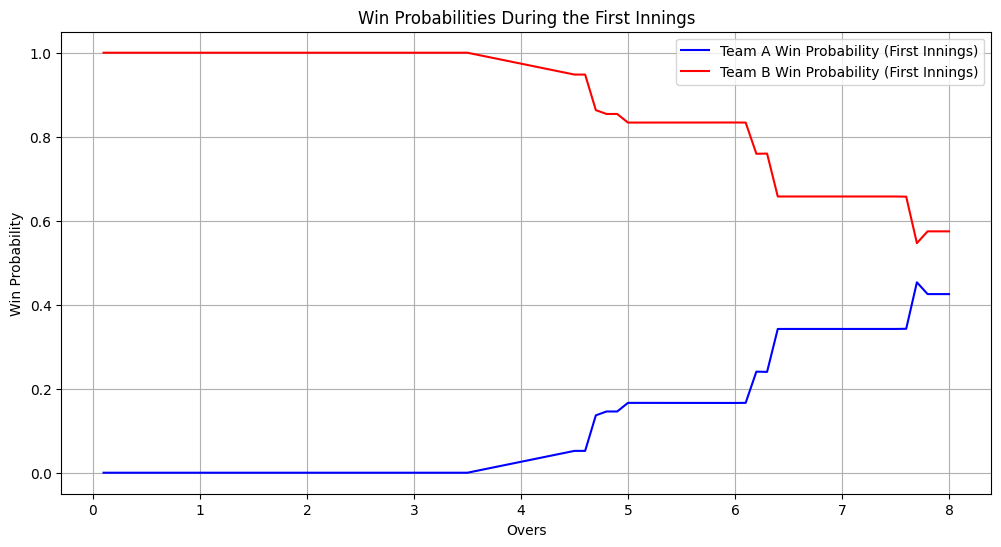

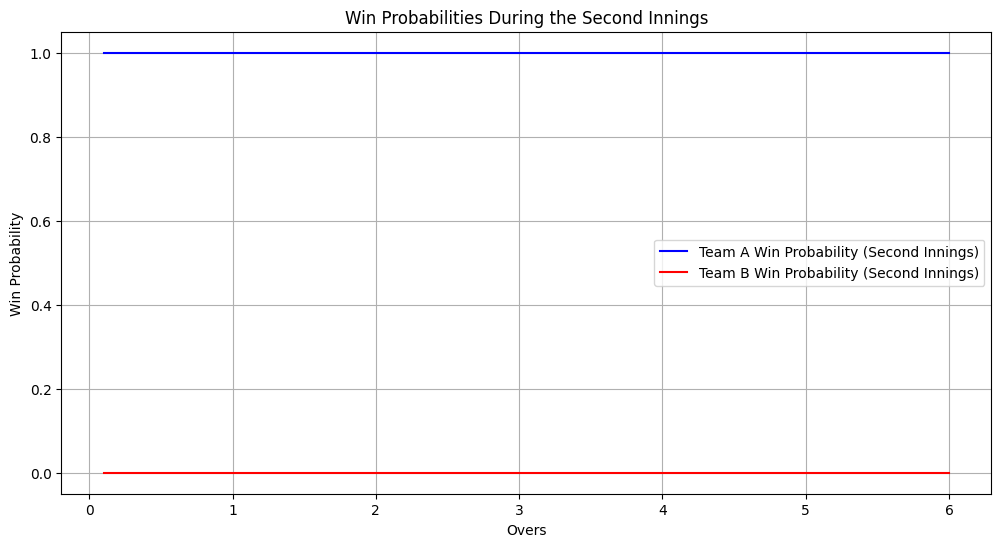

In [105]:

plt.figure(figsize=(12, 6))
plt.plot(first_innings_df['overs'], first_innings_df['winning_probability_by_team_A'], label='Team A Win Probability (First Innings)', color='blue')
plt.plot(first_innings_df['overs'], first_innings_df['winning_probability_by_team_B'], label='Team B Win Probability (First Innings)', color='red')
plt.xlabel('Overs')
plt.ylabel('Win Probability')
plt.title('Win Probabilities During the First Innings')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(second_innings_df['overs'], second_innings_df['winning_probability_by_team_A'], label='Team A Win Probability (Second Innings)', color='blue')
plt.plot(second_innings_df['overs'], second_innings_df['winning_probability_by_team_B'], label='Team B Win Probability (Second Innings)', color='red')
plt.xlabel('Overs')
plt.ylabel('Win Probability')
plt.title('Win Probabilities During the Second Innings')
plt.legend()
plt.grid(True)
plt.show()

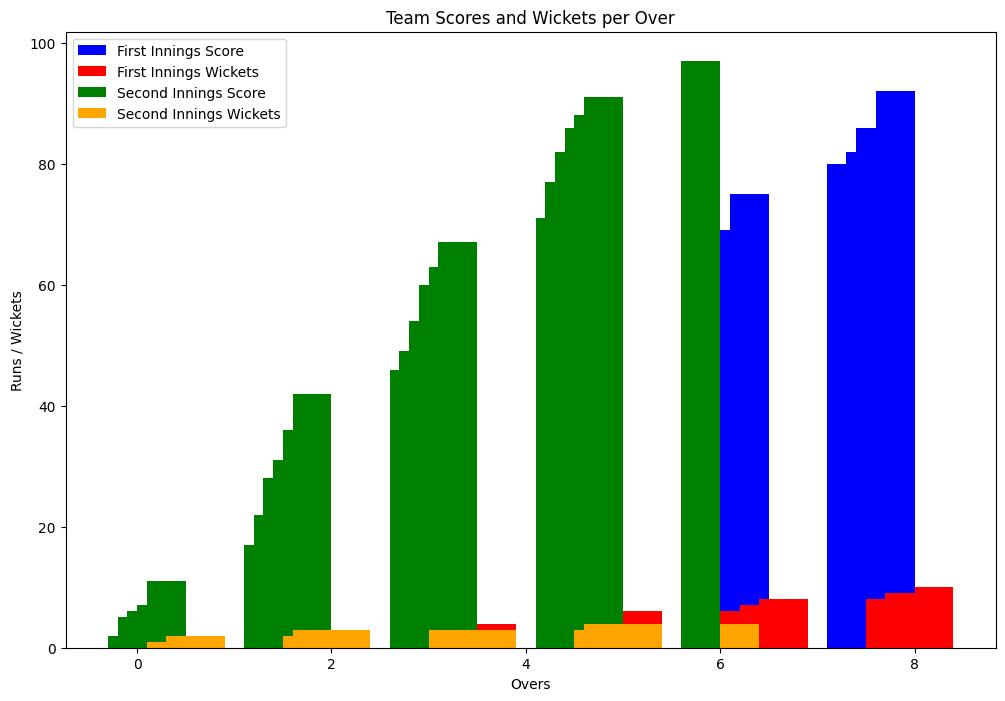

In [106]:
def aggregate_by_overs(df, innings):
    aggregated = df.groupby('overs').agg({
        f'team_score_{innings}': 'max',
        f'wickets_{innings}': 'max'
    }).reset_index()
    return aggregated
aggregated_first_innings = aggregate_by_overs(merged_df, 'first')
aggregated_second_innings = aggregate_by_overs(merged_df, 'second')

plt.figure(figsize=(12, 8))

plt.bar(aggregated_first_innings['overs'] - 0.2, aggregated_first_innings['team_score_first'], width=0.4, label='First Innings Score', color='blue')
plt.bar(aggregated_first_innings['overs'] + 0.2, aggregated_first_innings['wickets_first'], width=0.4, label='First Innings Wickets', color='red')

plt.bar(aggregated_second_innings['overs'] - 0.2, aggregated_second_innings['team_score_second'], width=0.4, label='Second Innings Score', color='green')
plt.bar(aggregated_second_innings['overs'] + 0.2, aggregated_second_innings['wickets_second'], width=0.4, label='Second Innings Wickets', color='orange')

plt.xlabel('Overs')
plt.ylabel('Runs / Wickets')
plt.title('Team Scores and Wickets per Over')
plt.legend()
plt.show()

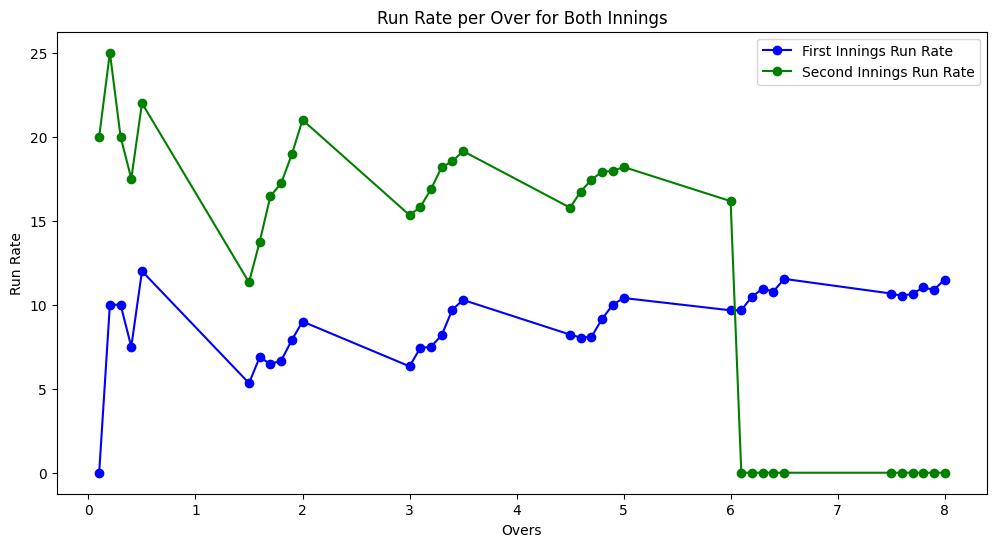

In [107]:
def calculate_run_rate_per_over(df, innings):
    df[f'run_rate_{innings}'] = df[f'team_score_{innings}'] / (df['overs'])
    return df

first_innings_run_rate = calculate_run_rate_per_over(merged_df, 'first')
second_innings_run_rate = calculate_run_rate_per_over(merged_df, 'second')

plt.figure(figsize=(12, 6))

plt.plot(first_innings_run_rate['overs'], first_innings_run_rate['run_rate_first'], label='First Innings Run Rate', color='blue', marker='o')

plt.plot(second_innings_run_rate['overs'], second_innings_run_rate['run_rate_second'], label='Second Innings Run Rate', color='green', marker='o')

plt.xlabel('Overs')
plt.ylabel('Run Rate')
plt.title('Run Rate per Over for Both Innings')
plt.legend()
plt.show()